In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\dobil\\Downloads\\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.shape


(205, 26)

In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
x=df[['enginesize']]
y=df['price']


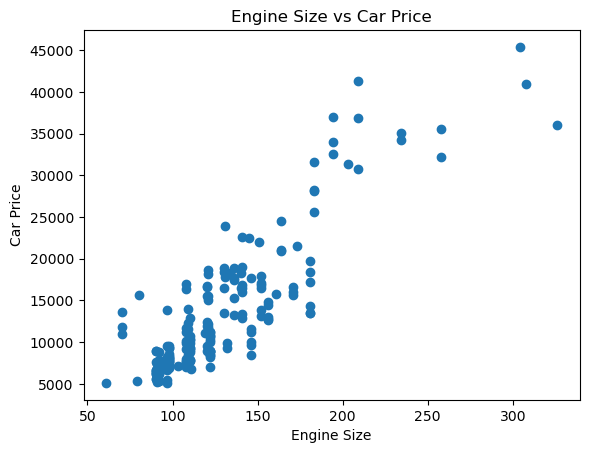

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
linear_model = LinearRegression()
linear_model.fit(x, y)
y_linear_pred = linear_model.predict(x)
engine_test = [[200]]
linear_prediction = linear_model.predict(engine_test)
print("Car Price for Engine Size 200 (Linear Regression):", linear_prediction[0])
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
X_poly_pred=poly_model.predict(X_poly)
engine_test = [[200]]
engine_test_poly = poly.transform(engine_test)
prediction=poly_model.predict(engine_test_poly)

print("Car Price for Engine Size 200:", prediction[0])


Car Price for Engine Size 200 (Linear Regression): 25534.237747489224
Car Price for Engine Size 200: 28205.131888243577


c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.metrics import r2_score, mean_squared_error
linear_r2 = r2_score(y, y_linear_pred)
linear_mse = mean_squared_error(y, y_linear_pred)

poly_r2 = r2_score(y, X_poly_pred)
poly_mse = mean_squared_error(y, X_poly_pred)
print("Linear Regression R²:", linear_r2)
print("Linear Regression MSE:", linear_mse)
print("Polynomial Regression R²:", poly_r2)
print("Polynomial Regression MSE:", poly_mse)

Linear Regression R²: 0.7641291357806176
Linear Regression MSE: 14980261.40555132
Polynomial Regression R²: 0.7938699575522645
Polynomial Regression MSE: 13091408.850448113


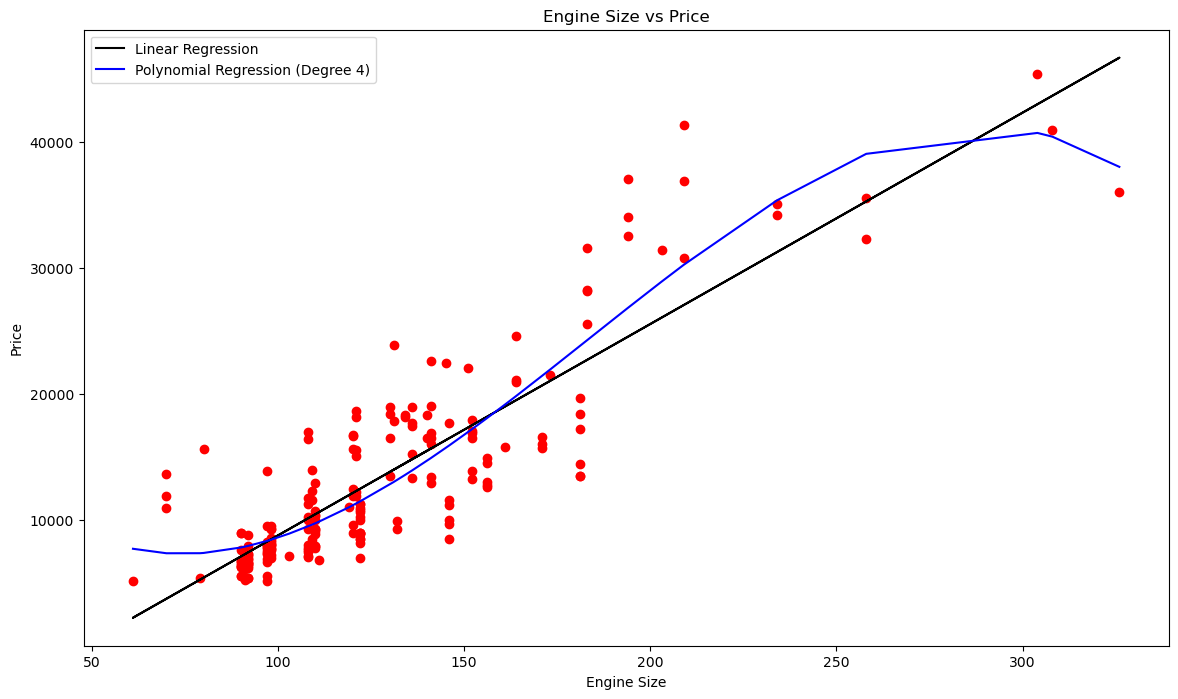

In [39]:
x_sorted = x.sort_values(by=['enginesize'])
X_poly_sorted = poly.transform(x_sorted)
y_poly_pred = poly_model.predict(X_poly_sorted)
plt.figure(figsize=(14,8))
plt.scatter(x, y, color='red')
plt.plot(x, y_linear_pred, color='black',label='Linear Regression')
plt.plot(x_sorted, y_poly_pred, color='blue',label='Polynomial Regression (Degree 4)')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")
plt.legend()
plt.show()